# Problem 2

In [2]:
#import the nescessary libs
import numpy as np
import torch

# Loading the Fashion-MNIST dataset
from torchvision import datasets, transforms

# Get GPU Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")


# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                    transforms.Normalize((0.5,), (0.5,))
                                                                   ])
# Download and load the training data
trainset = datasets.FashionMNIST('MNIST_data/', download = True, train = True, transform = transform)
testset = datasets.FashionMNIST('MNIST_data/', download = True, train = False, transform = transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size = 32, shuffle = True, num_workers=4)
testloader = torch.utils.data.DataLoader(testset, batch_size = 32, shuffle = True, num_workers=4)

# Examine a sample
dataiter = iter(trainloader)
images, labels = dataiter.next()

# Define the network architecture
from torch import nn, optim
import torch.nn.functional as F

model = nn.Sequential(nn.Linear(784, 128),
                      nn.ReLU(),
                      nn.Linear(128, 10),
                      #nn.LogSoftmax(dim = 1)
                     )
model.to(device)

# Define the loss
criterion = nn.CrossEntropyLoss()

# Define the optimizer
optimizer = optim.Adam(model.parameters(), lr = 0.001)

# Define the epochs
epochs = 5

train_losses, test_losses = [], []

# initialize the array for the graph
outputs = []


for e in range(epochs):
  running_loss = 0
  relu0 = []
  for images, labels in trainloader:
    # Flatten Fashion-MNIST images into a 784 long vector
    images = images.to(device)
    labels = labels.to(device)
    images = images.view(images.shape[0], -1)
    
    # Training pass
    optimizer.zero_grad()
    
    output = model.forward(images)
    output2 = model[0:1].forward(images)
    output3 = model[0:2].forward(images)
    output4 = model[0:3].forward(images)
    # For ReLU, gradient = 1 if positive, else 0
    relu0.append(sum(sum(output2>0)))
    loss = criterion(output, labels)
    loss.backward()

    optimizer.step()
    
    running_loss += loss.item()
  else:
    test_loss = 0
    accuracy = 0
    test = []
    # Turn off gradients for validation, saves memory and computation
    with torch.no_grad():
      # Set the model to evaluation mode
      model.eval()
      
      # Validation pass
      for images, labels in testloader:
        images = images.to(device)
        labels = labels.to(device)
        images = images.view(images.shape[0], -1)
        # Result from Linear
        test2 = model[0:1].forward(images)
        # Result from ReLU
        test3 = model[0:2].forward(images)
        # Result from Linear
        test4 = model[0:3].forward(images)
        # Result from Model equivalent to test4
        ps = model(images)

        

        test_loss += criterion(ps, labels)
        top_p, top_class = ps.topk(1, dim = 1)
        equals = top_class == labels.view(*top_class.shape)
        accuracy += torch.mean(equals.type(torch.FloatTensor))
    
    model.train()

    print("Epoch: {}/{}..".format(e+1, epochs),
          "Training loss: {:.3f}..".format(running_loss/len(trainloader)),
          "Test loss: {:.3f}..".format(test_loss/len(testloader)),
          "Test Accuracy: {:.3f}".format(accuracy/len(testloader)))
    outputs.append(sum(relu0))

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Epoch: 1/5.. Training loss: 0.487.. Test loss: 0.417.. Test Accuracy: 0.849
Epoch: 2/5.. Training loss: 0.374.. Test loss: 0.380.. Test Accuracy: 0.864
Epoch: 3/5.. Training loss: 0.337.. Test loss: 0.377.. Test Accuracy: 0.863
Epoch: 4/5.. Training loss: 0.316.. Test loss: 0.390.. Test Accuracy: 0.862
Epoch: 5/5.. Training loss: 0.299.. Test loss: 0.357.. Test Accuracy: 0.875


In [3]:
import matplotlib.pyplot as plt
import pandas as pd

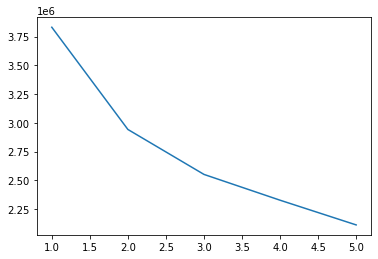

In [4]:
epochs = [1,2,3,4,5]
plt.plot(epochs,outputs)

a = []
for i in outputs:
  a.append(i.item())
outputs = a

df = pd.DataFrame(list(zip(epochs, outputs)),
              columns=['Epoch','Squared_Sum'])
df.to_csv('prob2.csv')

In [5]:
count = 0
for param in model.parameters():
  if count == 1:
    x = param
    y = param.grad
  count+=1